In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/Users/namanmuktha/Desktop/mediksearch/Tel & Ap Data/TelanganaAyushData.csv')

In [3]:
df.head()

,COLLEGE,RANK,LOC,CAT,SX,EWS,PHASE
0,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",86541.0,AU,OC,F,NO,P1
1,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",111166.0,AU,BCB,M,NO,P1
2,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",172588.0,OU,OC,M,NO,P1
3,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",180417.0,OU,BCD,F,NO,P1
4,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",181467.0,OU,BCD,F,NO,P1


In [4]:
df.isna().sum()

COLLEGE    0
RANK       4
LOC        4
CAT        4
SX         4
EWS        0
PHASE      4
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.head()

,COLLEGE,RANK,LOC,CAT,SX,EWS,PHASE
0,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",86541.0,AU,OC,F,NO,P1
1,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",111166.0,AU,BCB,M,NO,P1
2,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",172588.0,OU,OC,M,NO,P1
3,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",180417.0,OU,BCD,F,NO,P1
4,"DR. B.R.K.R. GOVT. AYURVEDIC COLLEGE, HYDERABAD.",181467.0,OU,BCD,F,NO,P1


In [7]:
df.isna().sum()

COLLEGE    0
RANK       0
LOC        0
CAT        0
SX         0
EWS        0
PHASE      0
dtype: int64

array([[<Axes: title={'center': 'RANK'}>]], dtype=object)

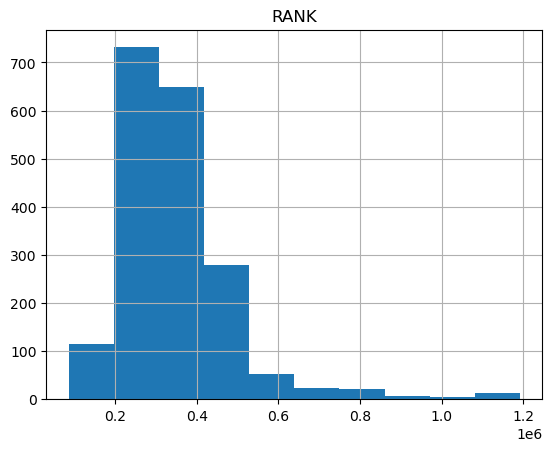

In [9]:
df.hist()

In [12]:
df["RANK"].describe()

count    1.895000e+03
mean     3.460320e+05
std      1.395174e+05
min      8.654100e+04
25%      2.612175e+05
50%      3.196990e+05
75%      3.978275e+05
max      1.191440e+06
Name: RANK, dtype: float64

In [13]:
df.shape

(1895, 7)

In [14]:
df.nunique()

COLLEGE     10
RANK       714
LOC          4
CAT          8
SX           2
EWS          2
PHASE        4
dtype: int64

In [15]:
df.nunique()

COLLEGE     10
RANK       714
LOC          4
CAT          8
SX           2
EWS          2
PHASE        4
dtype: int64

<Axes: xlabel='COLLEGE', ylabel='count'>

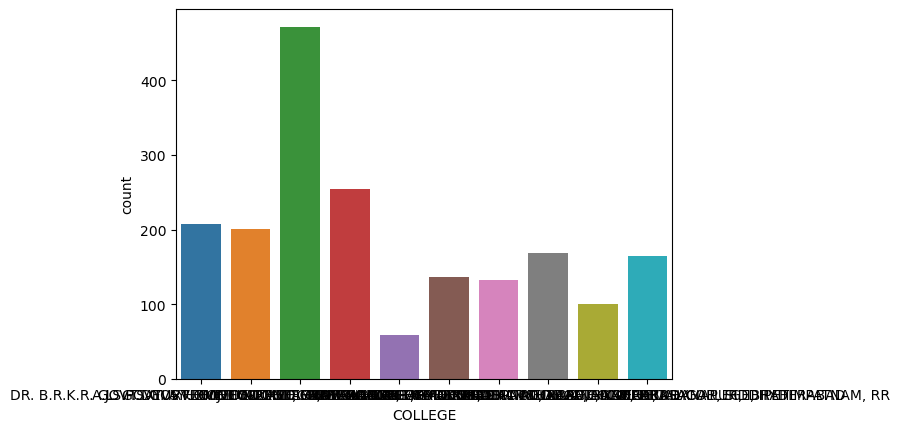

In [16]:
sns.countplot(data=df,x="COLLEGE")

In [17]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['COLLEGE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['COLLEGE'] = encoded_values

In [18]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['SX']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['SX'] = encoded_values

In [19]:
one_hot_encoded = pd.get_dummies(df['CAT'], prefix='CAT')

# Drop the original 'CAT' column from the DataFrame
df = df.drop('CAT', axis=1)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)


In [20]:

from sklearn.preprocessing import LabelEncoder
disorder_column = df['LOC']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_loc = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['LOC'] = encoded_values

In [21]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['PHASE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_phase = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['PHASE'] = encoded_values

In [22]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['EWS']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_phase = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['EWS'] = encoded_values

In [23]:
df.head()

,COLLEGE,RANK,LOC,SX,EWS,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
0,2,86541.0,0,0,0,0,False,False,False,False,False,True,False,False
1,2,111166.0,0,1,0,0,False,True,False,False,False,False,False,False
2,2,172588.0,2,1,0,0,False,False,False,False,False,True,False,False
3,2,180417.0,2,0,0,0,False,False,False,True,False,False,False,False
4,2,181467.0,2,0,0,0,False,False,False,True,False,False,False,False


In [24]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=75, encode='ordinal', strategy='uniform')

# Fit and transform the continuous column
df['discrete_column'] = discretizer.fit_transform(df[['RANK']])

# Print the DataFrame with the discretized column
print(df)

      COLLEGE      RANK  LOC  SX  EWS  PHASE  CAT_BCA  CAT_BCB  CAT_BCC  \
0           2   86541.0    0   0    0      0    False    False    False   
1           2  111166.0    0   1    0      0    False     True    False   
2           2  172588.0    2   1    0      0    False    False    False   
3           2  180417.0    2   0    0      0    False    False    False   
4           2  181467.0    2   0    0      0    False    False    False   
...       ...       ...  ...  ..  ...    ...      ...      ...      ...   
1894        5  507762.0    2   0    0      2    False    False    False   
1895        5  628117.0    2   0    0      1    False    False    False   
1896        5  746570.0    2   0    0      1    False    False    False   
1897        5  844440.0    2   1    0      3    False    False    False   
1898        5  911951.0    2   1    0      3    False    False    False   

      CAT_BCD  CAT_BCE  CAT_OC  CAT_SC  CAT_ST  discrete_column  
0       False    False    True   

/Users/namanmuktha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [25]:
df.head()

,COLLEGE,RANK,LOC,SX,EWS,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST,discrete_column
0,2,86541.0,0,0,0,0,False,False,False,False,False,True,False,False,0.0
1,2,111166.0,0,1,0,0,False,True,False,False,False,False,False,False,1.0
2,2,172588.0,2,1,0,0,False,False,False,False,False,True,False,False,5.0
3,2,180417.0,2,0,0,0,False,False,False,True,False,False,False,False,6.0
4,2,181467.0,2,0,0,0,False,False,False,True,False,False,False,False,6.0


In [26]:
df.nunique()

COLLEGE             10
RANK               714
LOC                  4
SX                   2
EWS                  2
PHASE                4
CAT_BCA              2
CAT_BCB              2
CAT_BCC              2
CAT_BCD              2
CAT_BCE              2
CAT_OC               2
CAT_SC               2
CAT_ST               2
discrete_column     60
dtype: int64

<Axes: xlabel='COLLEGE', ylabel='count'>

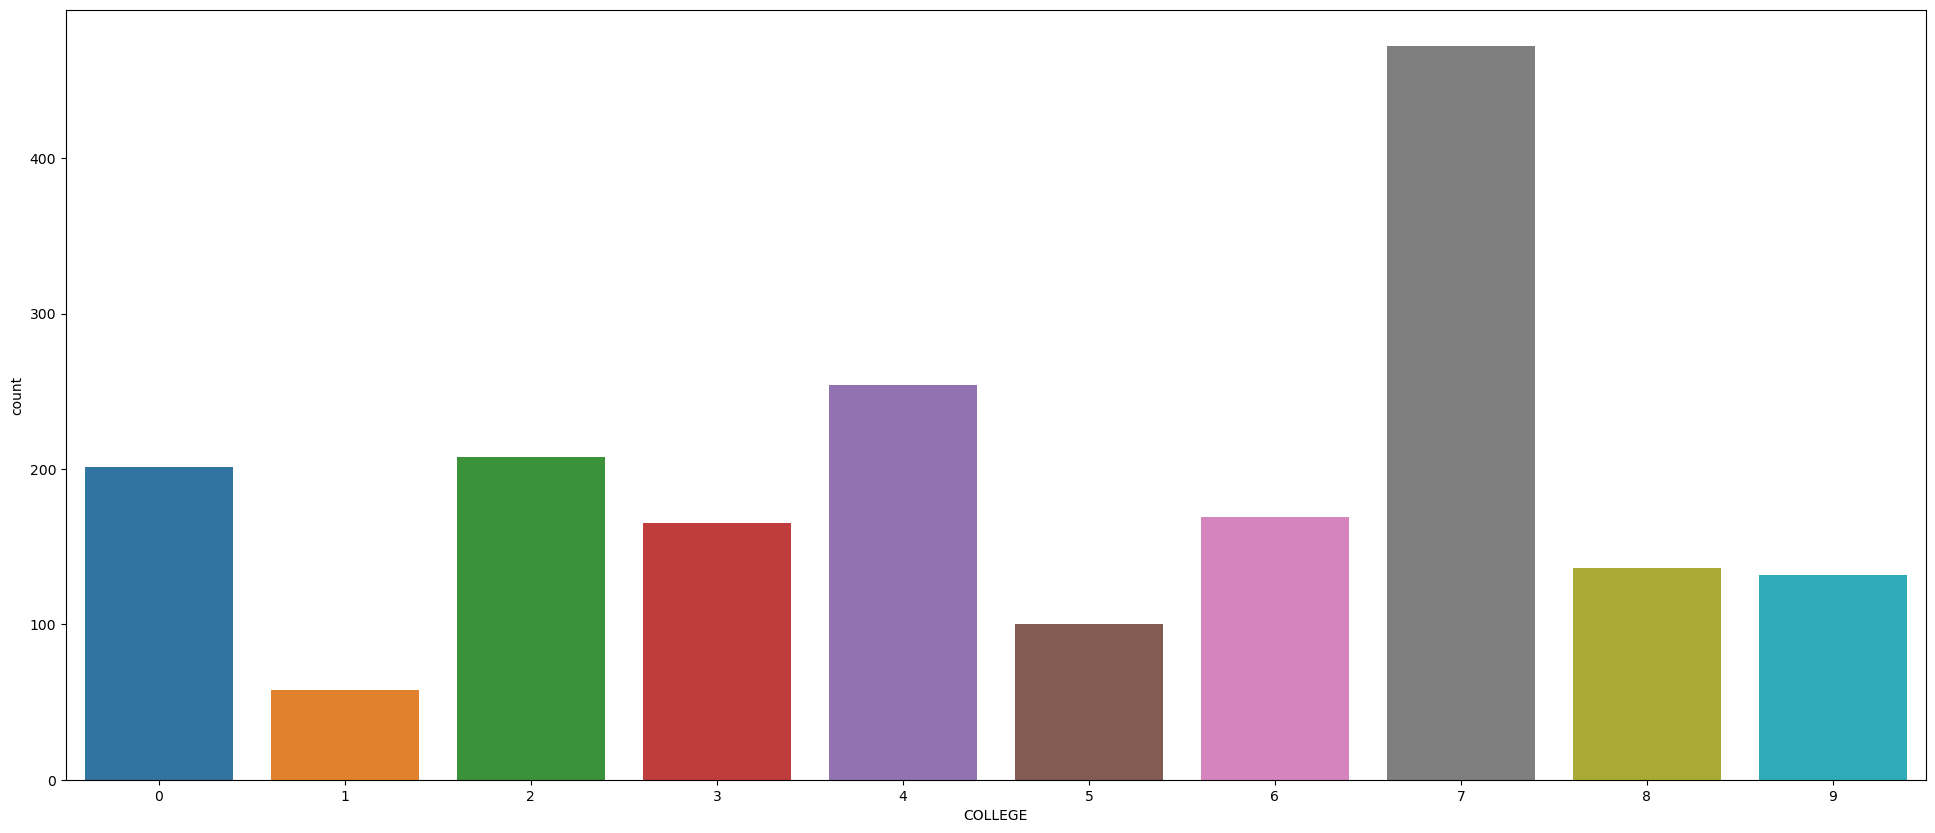

In [27]:
plt.figure(figsize=(24,10))
sns.countplot(data=df,x="COLLEGE")

In [28]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=420)

In [29]:
X=df.drop(['COLLEGE'],axis=1)
y=df['COLLEGE']

In [30]:
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [31]:
df_updated=X_resampled

In [32]:
df_updated['COLLEGE']=y_resampled

<Axes: xlabel='COLLEGE', ylabel='count'>

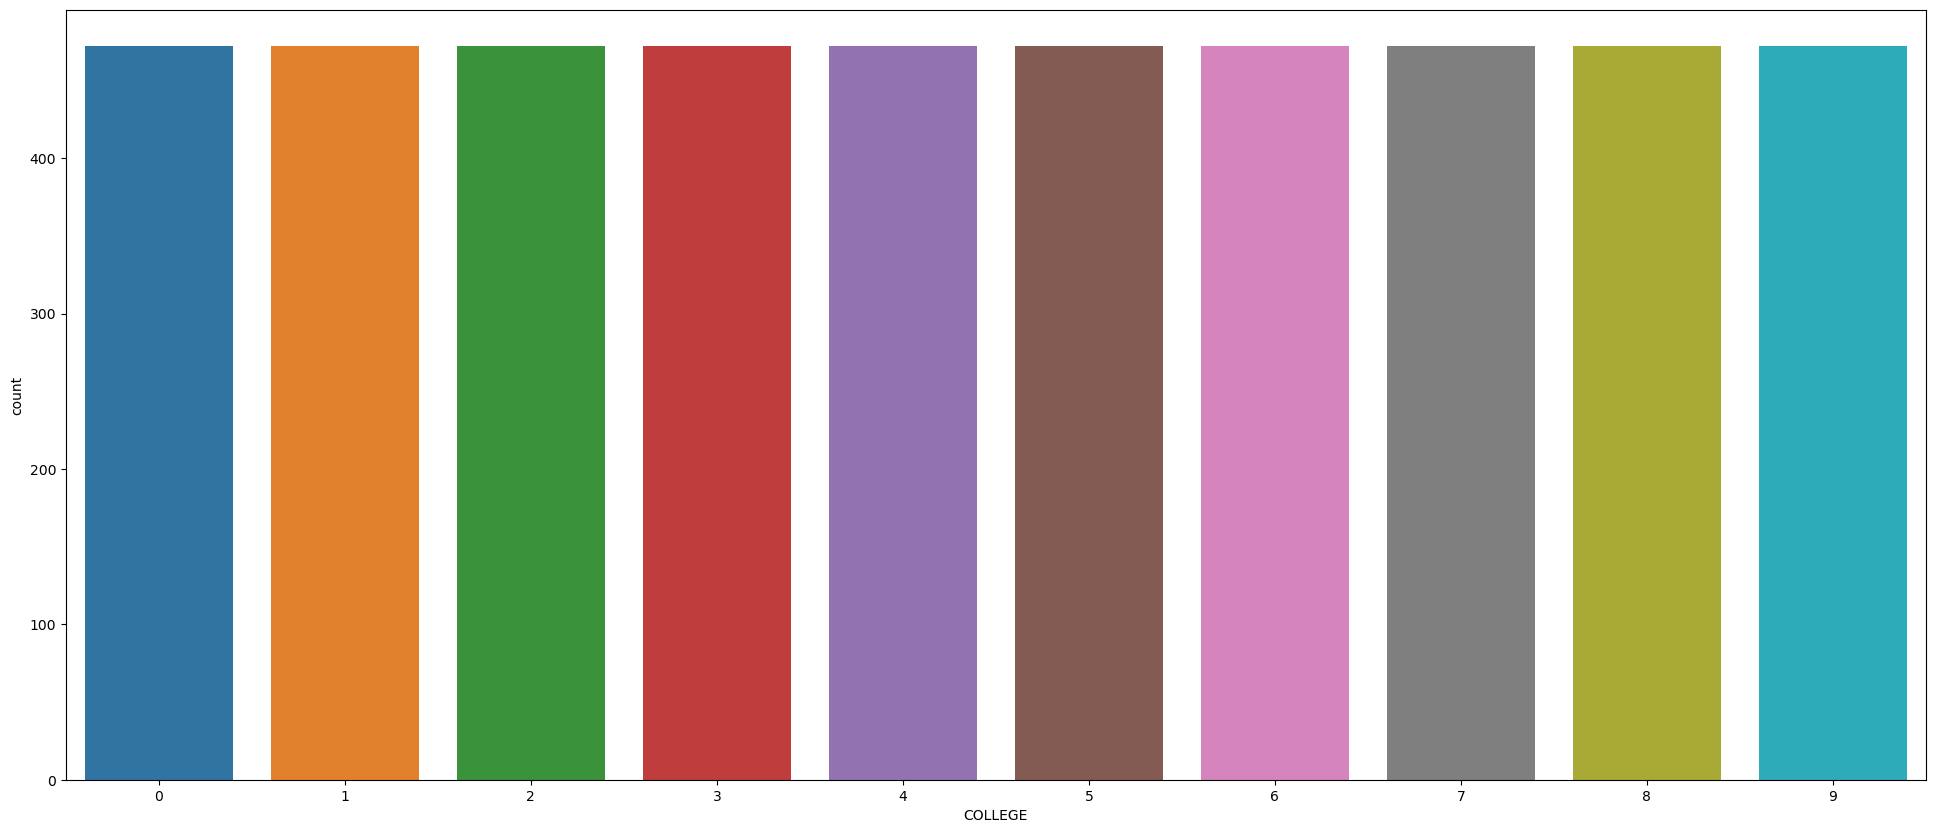

In [33]:
plt.figure(figsize=(24,10))
sns.countplot(data=df_updated,x="COLLEGE")

In [34]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(df_updated.drop(["COLLEGE"],axis=1),df_updated["COLLEGE"],test_size=0.2,random_state=231)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_p=rfc.predict(X_test)
print(accuracy_score(y_p,y_test)*100)
print(confusion_matrix(y_p,y_test))
print(classification_report(y_p,y_test))

94.27966101694916
[[ 98   0   1   0   0   0   0   4   0   0]
 [  0  92   0   0   0   0   0   1   0   0]
 [  0   0 105   0   0   0   0   2   0   0]
 [  0   0   0  92   0   0   2   6   0   0]
 [  0   0   0   0  93   0   1   0   0   0]
 [  0   0   0   0   0 100  21   3   0   0]
 [  0   0   0   0   2   0  79   2   0   0]
 [  0   0   0   2   2   0   0  71   0   0]
 [  0   0   0   0   1   0   0   0  83   0]
 [  0   0   0   0   0   0   4   0   0  77]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       103
           1       1.00      0.99      0.99        93
           2       0.99      0.98      0.99       107
           3       0.98      0.92      0.95       100
           4       0.95      0.99      0.97        94
           5       1.00      0.81      0.89       124
           6       0.74      0.95      0.83        83
           7       0.80      0.95      0.87        75
           8       1.00      0.99      0.99        84
          

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split=2)
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)
print(accuracy_score(y_p,y_test))
print(classification_report(y_p,y_test))

0.9385593220338984
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       1.00      0.97      0.98        95
           2       0.99      0.98      0.99       107
           3       0.99      0.89      0.93       105
           4       0.92      0.97      0.94        93
           5       1.00      0.81      0.90       123
           6       0.74      0.96      0.84        82
           7       0.79      0.97      0.87        72
           8       1.00      0.99      0.99        84
           9       1.00      0.94      0.97        82

    accuracy                           0.94       944
   macro avg       0.94      0.94      0.94       944
weighted avg       0.95      0.94      0.94       944

